
 
_В данном проекте разберем:_ 
- [x] [Метрики](#1)
- [x] [Когортный анализ](#2)
- [x] [RFM - анализ](#3)

### <b>Загрузим библиотеки и вспомогающие функции:</b>
--------------------------------------------------------

In [238]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta
import calendar


# Библиотеки для функции отображения нескольких таблиц: 
from IPython.display import display_html
from itertools import chain,cycle

## Функция для отображения нескольких таблиц в одном окне:
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2 style="text-align: center;">{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

# Библиотеки для игнорирования ошибок:
import warnings
warnings.filterwarnings("ignore")

#### Входные данные
_______________________
Имеем 3 csv-файла:
- [x] olist_customers_dataset.csv - таблица с уникальными идентификаторами пользователей.
- [x] olist_orders_dataset.csv - таблица заказов.
- [x] olist_order_items_dataset.csv - товарные позиции, входящие в заказы.  

#### Ходы решения:
_____________
- [ ] Загрузка данных 
- [ ] Проведение EDA 
- [ ] Нахождение метрик
- [ ] Когортный анализ
- [ ] RFM - анализ


- [x] __Загружаем данные__ 
_______________

In [2]:
Cust = pd.read_csv ('olist_customers_dataset.csv', sep =',')
Ords = pd.read_csv ('olist_orders_dataset.csv', sep =',')
Ord = pd.read_csv ('olist_order_items_dataset.csv', sep =',')

- [x] __Проводим разведочный анализ данных EDA__
__________________

##### Смотрим общую информацию датасетов
-----------

In [3]:
Cust.info()
Ords.info()
Ord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4

__Вывод:__   
Колонки с датами в таблице Ords имеют тип "object" (далее приведём к типу "datetime64")   
Количество строк нормальное.   


##### Смотрим количество уникальных значений:
-----------

In [4]:
display_side_by_side(Cust.nunique().reset_index(),
                        Ords.nunique().reset_index(),
                        Ord.nunique().reset_index(),
                        titles=['Cust', 'Ords','Ord'])

,index,0
0,customer_id,99441
1,customer_unique_id,96096
2,customer_zip_code_prefix,14994
3,customer_city,4119
4,customer_state,27
,index,0
0,order_id,99441
1,customer_id,99441
2,order_status,8
3,order_purchase_timestamp,98875


__Вывод:__     
Количество уникальных значений совпадает с количеством строк в датасетах.

__Поиск пропущенных значений:__
________________

In [5]:
display_side_by_side(Cust.isnull().sum().reset_index(),
                        Ords.isnull().sum().reset_index(),
                        Ord.isnull().sum().reset_index(),
                        titles=['Cust', 'Ords','Ord'])

,index,0
0,customer_id,0
1,customer_unique_id,0
2,customer_zip_code_prefix,0
3,customer_city,0
4,customer_state,0
,index,0
0,order_id,0
1,customer_id,0
2,order_status,0
3,order_purchase_timestamp,0


__Вывод:__      
Выявлены пропущенные значения (далее избавимся от них)

__Переводим в тип "datetime64"__      


In [6]:
Ords["order_purchase_timestamp"] = pd.to_datetime(Ords["order_purchase_timestamp"])
Ords["order_estimated_delivery_date"] = pd.to_datetime(Ords["order_estimated_delivery_date"])
Ords["order_approved_at"] = pd.to_datetime(Ords["order_approved_at"])
Ords["order_delivered_carrier_date"] = pd.to_datetime(Ords["order_delivered_carrier_date"])
Ords["order_delivered_customer_date"] = pd.to_datetime(Ords["order_delivered_customer_date"])

## Нахождение метрик
<a id='1'></a>

<b> Вопрос 1. Сколько у нас пользователей, которые совершили покупку только один раз?</b>

Пользователи совершившие покупку только один раз - будут те пользователи, у которых есть данные о "подтверждении оплаты заказа", т.е. которые хоть раз оплачивали товар. 
Покупкой является оплата товара - дальнейшая судьба этого заказа (Возврат, недоступен и т.д.) "это уже совсем другая история"

<b> Выбираем из датасетов нужные нам данные: </b>  

Из таблицы заказов берём "customer_id" - по нему будем объединять, "order_approved_at" - интересущее нас подтверждение оплаты.

Из таблицы пользователей берём "customer_id" - по нему будем объединять, 
"customer_unique_id" - по нему будем считать кол-во пользователей

In [7]:
Ords_m1 = Ords[['customer_id','order_approved_at']] 
Cust_m1 = Cust[['customer_id','customer_unique_id']]

Объединяем созданные датасеты по "customer_id" :

In [8]:
First_zd = Ords_m1.merge(Cust_m1, how='inner', on = 'customer_id')

Анализируя данные - были обнаружены "Nan" значения. 
Перезапишем наш датафрейм, убрав "Nan" значения.

In [9]:
First_zd = First_zd.dropna()

Группируем наш датафрейм и считаем количесвто "Потверждённых оплат":

In [10]:
First_zd_1 = First_zd\
    .groupby('customer_unique_id',as_index = False)\
    .agg({'order_approved_at':'count'})\
    .rename(columns = {'order_approved_at':'count_buy'})

Отбираем строки, где у пользователей только одна подтверждённая оплата:

In [11]:
First_zd_1 = First_zd_1.query('count_buy == 1')

Присваиваем ответ на первое задание "Cust_buy_one", подстраховываясь "nunique" (убираем возможные дубликаты)

In [12]:
Cust_buy_one = First_zd_1.customer_unique_id.nunique()
print("Ответ: Пользователей совершивших покупку только один раз =",Cust_buy_one)

Ответ: Пользователей совершивших покупку только один раз = 93049


<b> Вопрос 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?</b>

Доставленными заказами будут являться только те заказы, статус которых "delivered" и в столбце "время доставки заказа" стоит дата. По остальным же рассмотрим детализацию.

Отбираем заказы, статус которых не соотвтетствует "delivered".

In [13]:
Second_zd = Ords.query('order_status != "delivered"')

Проверяем столбец "время доставки заказа" на уникальные значения, и замечаем, что у нас есть товары доставка которых 
осуществилась, но клиент по каким-либо причинам отменил товар.

In [14]:
Second_zd.order_delivered_customer_date.unique()

array([                          'NaT', '2018-03-21T22:03:51.000000000',
       '2016-10-16T14:36:59.000000000', '2016-10-14T15:07:11.000000000',
       '2016-10-19T18:47:43.000000000', '2016-11-08T10:58:34.000000000',
       '2016-11-09T14:53:50.000000000'], dtype='datetime64[ns]')

Создаем bool-столбец для фильтрации Nan значений в "order_delivered_customer_date".

In [15]:
Second_zd['bool_delivered'] = Second_zd.order_delivered_customer_date.isna()

Выбираем строки, где в "order_delivered_customer_date" будет только Nan значения. И сразу проверяем.

In [16]:
Second_zd = Second_zd.query('bool_delivered == True')
Second_zd.order_delivered_customer_date.unique()

array(['NaT'], dtype='datetime64[ns]')

Рассчитаем кол-во месяцев между первой и последней даты обещенной доставки из "родного" датасета:

In [17]:
month_between = (Ords.order_estimated_delivery_date.max().year - Ords.order_estimated_delivery_date.min().year) \
* 12 + Ords.order_estimated_delivery_date.max().month - Ords.order_estimated_delivery_date.min().month

Сгруппируем наши данные по статусу заказа и проагрегируем по количеству значений недоставленных заказов через "bool_delivered"

In [18]:
Second_zd2 = Second_zd\
    .groupby('order_status', as_index = False)\
    .agg({'bool_delivered':'count'})\
    .rename(columns = {'bool_delivered':'clanced_delivered'})
Second_zd2

,order_status,clanced_delivered
0,approved,2
1,canceled,619
2,created,5
3,invoiced,314
4,processing,301
5,shipped,1107
6,unavailable,609


Рассчитаем среднее за месяц по каждому статусу заказа: 

In [19]:
Second_zd2['mean_delivered'] = Second_zd2['clanced_delivered']/month_between
Second_zd2

,order_status,clanced_delivered,mean_delivered
0,approved,2,0.076923
1,canceled,619,23.807692
2,created,5,0.192308
3,invoiced,314,12.076923
4,processing,301,11.576923
5,shipped,1107,42.576923
6,unavailable,609,23.423077


<b> Мы получили следующие значения среднего за месяц не доставленных заказов. Теперь разберемся в причинах.</b>
    
 - approved		0.076923 
            
            - После подтвреждения оплаты, не передано на сборку.
 - canceled		23.807692 
             
             - Клиент отменил на пути "жизненного цикла" доставки.
 - created		0.192308  
 
              - Не был выставлен счёт клиенту. 
 - invoiced		12.076923 
            
            - Выставлен счёт, но не было подтверждения оплаты заказа клиентом ("order_approved_at" = NaN)
 - processing	11.576923 
            
            - На этапе сборки так и не произошла отгрузка/передача заказа в логистическую службу. 
 - shipped		42.576923 
            
            - С логистической службы товар так и не доехал до клиента в нужный срок.
 - unavailable	23.423077 
            
            - Товар был оплачен, но по каким-либо причинам недоступен (скорее нет в наличии)

<b>  Вопрос 3. По каждому товару определить, в какой день недели товар чаще всего покупается.</b>


Выбираем из датасетов нужные нам данные: 

   Из таблицы товарных позиций берём "order_id" - по нему будем объединять, "product_id" - интересущее нас товары.
   
   Из таблицы заказов берём "order_id" - по нему будем объединять, "order_approved_at" - интересущее нас подтверждение оплаты.

In [20]:
Ord_m2 = Ord[['order_id','product_id']] 
Ords_m2 = Ords[['order_id','order_approved_at']]

Объединяем созданные датасеты по "order_id" :

In [21]:
third_zd = Ord_m2.merge(Ords_m2, how='inner', on = 'order_id')
third_zd

,order_id,product_id,order_approved_at
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,2017-09-13 09:45:35
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,2017-04-26 11:05:13
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,2018-01-14 14:48:30
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,2018-08-08 10:10:18
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,2017-02-04 14:10:13
...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,2018-04-25 04:11:01
112646,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,2018-07-17 04:31:48
112647,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,2017-10-24 17:14:25
112648,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,2017-08-15 00:04:32


Создаем колонку 'Day_of_Week' которая будет содержать название дня недели нашей даты:

In [22]:
third_zd['Day_of_Week'] = third_zd['order_approved_at'].dt.day_name()

Группируем наши данные по id-товара и дню недели, агрегируем по количеству купленных в эти дни и сортируем по кол-во дней:

In [23]:
third_zd_2 = third_zd\
    .groupby(['product_id','Day_of_Week'], as_index = False)\
    .agg({'order_id':'count'})\
    .rename(columns={'order_id':'Count_day'})\
    .sort_values('Count_day', ascending = False)
third_zd_2

,product_id,Day_of_Week,Count_day
41082,aca2eb7d00ea1a7b8ebd4e68314663af,Tuesday,119
20152,53b36df67ebb7c41585e8d54d6772e08,Tuesday,105
41077,aca2eb7d00ea1a7b8ebd4e68314663af,Friday,96
15933,422879e10f46682990de24d770e7f83d,Tuesday,89
41083,aca2eb7d00ea1a7b8ebd4e68314663af,Wednesday,89
...,...,...,...
23986,63ee501f72520d5ec54cef5fd3a21a20,Wednesday,1
23988,63f4d40c05db6ade462cecef857eec34,Monday,1
23990,63f4d40c05db6ade462cecef857eec34,Wednesday,1
23991,63f52009dc3ddb733394e80183aed0f0,Saturday,1


Нас просят узнать максимальное значение по каждому товару: 

In [24]:
idx = third_zd_2.groupby(['product_id'])['Count_day'].transform(max) == third_zd_2['Count_day']
third_zd_3 = third_zd_2[idx]
third_zd_3

,product_id,Day_of_Week,Count_day
41082,aca2eb7d00ea1a7b8ebd4e68314663af,Tuesday,119
20152,53b36df67ebb7c41585e8d54d6772e08,Tuesday,105
15933,422879e10f46682990de24d770e7f83d,Tuesday,89
36574,99a4788cb24856965c36a24e339b6058,Tuesday,82
13060,368c6c730842d78016ad823897a372db,Thursday,80
...,...,...,...
23992,63f7a4366da7b3a3cb5bd2336ca15f7e,Friday,1
23980,63e51e65ec59b56039c6427eed73dcf0,Tuesday,1
23981,63eb97106bfe47fe857edcf78f3e3e08,Saturday,1
23991,63f52009dc3ddb733394e80183aed0f0,Saturday,1


Получились товары, гдем максимальное количество совпадает в нескольких днях, 
мы можем избавиться от этого по желанию, с помощью удаления дубликатов product_id

In [25]:
third_zd_33 = third_zd_3.drop_duplicates(['product_id'], keep='last')
third_zd_33

,product_id,Day_of_Week,Count_day
41082,aca2eb7d00ea1a7b8ebd4e68314663af,Tuesday,119
20152,53b36df67ebb7c41585e8d54d6772e08,Tuesday,105
15933,422879e10f46682990de24d770e7f83d,Tuesday,89
36574,99a4788cb24856965c36a24e339b6058,Tuesday,82
13060,368c6c730842d78016ad823897a372db,Thursday,80
...,...,...,...
23992,63f7a4366da7b3a3cb5bd2336ca15f7e,Friday,1
23980,63e51e65ec59b56039c6427eed73dcf0,Tuesday,1
23981,63eb97106bfe47fe857edcf78f3e3e08,Saturday,1
23991,63f52009dc3ddb733394e80183aed0f0,Saturday,1


провереям: 

In [26]:
third_zd_3.product_id.nunique()

32948

<b> Ответ </b> 

Частота покупки товара по дню недели записаны в third_zd_3 (если нас интересуют дубликаты по товарам, например присутствует товар у которого частота одинакова в 6 разных днях неделях) и third_zd_33 (без дубликатов, только максимальные числа).

<b> Вопрос 4 </b> 

Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

In [27]:
First_zd_4 = First_zd.copy()
First_zd_4['order_approved_at'] = First_zd_4['order_approved_at'].dt.strftime('%Y-%m')

Группируем данные по id и дате подтверждения оплаты, и считаем количество оплат в месяц.

In [28]:
First_zd_44 = First_zd_4\
    .groupby(['customer_unique_id','order_approved_at'], as_index = False)\
    .agg({'customer_id':'count'})\
    .rename(columns={'customer_id':'count_buy'})\
    .sort_values('count_buy', ascending = False)

Переводим столбец в формат даты и создаем колонки month и year (вытаскивая данные из даты подтверждения оплаты)

In [29]:
First_zd_44["order_approved_at"] = pd.to_datetime(First_zd_44["order_approved_at"])

In [30]:
First_zd_44['month'] = First_zd_44.order_approved_at.dt.strftime('%m').astype (int)

In [31]:
First_zd_44['year'] = First_zd_44.order_approved_at.dt.strftime('%Y').astype (int)

Находим сколько недель в месяце. Применяем monthrange к нашим датам, выбирая значения из столбца year и год и делим на количество дней в недели: 

In [32]:
First_zd_44['week'] = First_zd_44.apply(lambda x:(calendar.monthrange(x['year'],x["month"])[1])/7, axis = 1)

Считаем сколько у каждого из пользователей в среднем покупок в неделю (данные запишем в столбец 'mean_week'):

In [33]:
First_zd_44['mean_week'] = First_zd_44['count_buy']/First_zd_44['week']

<b> Ответ: </b> 

In [34]:
First_zd_44[['customer_unique_id','order_approved_at','mean_week']]

,customer_unique_id,order_approved_at,mean_week
7316,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01-01,1.354839
14471,25a560b9a6006157838aab1bdbd68624,2017-04-01,0.933333
67664,b08fab27d47a1eb6deda07bfd965ad43,2017-09-01,0.933333
50560,83e7958a94bd7f74a9414d8782f87628,2017-01-01,0.903226
76689,c8460e4251689ba205045f3ea17884a1,2018-08-01,0.903226
...,...,...,...
32821,559c5ec4792aa8e44f53927870b23cf9,2018-03-01,0.225806
32820,559b4e068cbe3b0fe760abd5baad57a9,2018-02-01,0.250000
32819,559a8ee3945ef2efb08cf74e36c8b747,2018-04-01,0.233333
32818,559a5f67ea052226bb24ee8da93df761,2018-01-01,0.225806


## Когортный анализ
<a id='2'></a>

<b> Вопрос 5 </b> 

Проведём когортный анализ пользователей и определим когорту с самым высоким retention на 3й месяц в период с января по декабрь. 

Выбираем из датасетов нужные нам данные: 

Из таблицы заказов берём "customer_id" - по нему будем объединять, "order_purchase_timestamp" - интересущее нас дата заказа.

Из таблицы пользователей берём "customer_id" - по нему будем объединять, 
"customer_unique_id" - по нему будем считать кол-во пользователей

In [35]:
Ords_m5 = Ords[['customer_id','order_purchase_timestamp']] 
Cust_m5 = Cust[['customer_id','customer_unique_id']]

Объединяем созданные датасеты по "customer_id" :

In [36]:
Five_zd = Ords_m5.merge(Cust_m5, how='inner', on = 'customer_id')

Создаем столбец выделяя месяц из нашей даты:

In [37]:
Five_zd['month'] = Five_zd['order_purchase_timestamp'].to_numpy().astype('datetime64[M]')
Five_zd

,customer_id,order_purchase_timestamp,customer_unique_id,month
0,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,2017-10-01
1,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,2018-07-01
2,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-01
3,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977,2017-11-01
4,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-01
...,...,...,...,...
99436,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:05,6359f309b166b0196dbf7ad2ac62bb5a,2017-03-01
99437,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:58,da62f9e57a76d978d02ab5362c509660,2018-02-01
99438,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:43,737520a9aad80b3fbbdad19b66b37b30,2017-08-01
99439,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:27,5097a5312c8b157bb7be58ae360ef43c,2018-01-01


"В период с января по декабрь", значит полноценный период в наших данных - это 2017 год, 
поэтому проведем фильтрацию наших данных и запишем в новую переменную: 

In [38]:
Five_zd_1 = Five_zd.loc[(Five_zd['month'] >= '2017-01-01') & (Five_zd['month'] < '2018-01-01')]
Five_zd_1

,customer_id,order_purchase_timestamp,customer_unique_id,month
0,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,2017-10-01
3,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977,2017-11-01
5,503740e9ca751ccdda7ba28e9ab8f608,2017-07-09 21:57:05,80bb27c7c16e8f973207a5086ab329e2,2017-07-01
6,ed0271e0b7da060a393796590e7b737a,2017-04-11 12:22:08,36edbb3fb164b1f16485364b6fb04c73,2017-04-01
7,9bdf08b4b3b52b5526ff42d37d47f222,2017-05-16 13:10:30,932afa1e708222e5821dac9cd5db4cae,2017-05-01
...,...,...,...,...
99433,da2124f134f5dfbce9d06f29bdb6c308,2017-10-04 19:57:37,c716cf2b5b86fb24257cffe9e7969df8,2017-10-01
99434,f01a6bfcc730456317e4081fe0c9940e,2017-01-27 00:30:03,e03dbdf5e56c96b106d8115ac336f47f,2017-01-01
99435,47cd45a6ac7b9fb16537df2ccffeb5ac,2017-02-23 09:05:12,831ce3f1bacbd424fc4e38fbd4d66d29,2017-02-01
99436,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:05,6359f309b166b0196dbf7ad2ac62bb5a,2017-03-01


Группируем наши данные по уникальным клиентам и дате и считаем количество покупок:

In [39]:
Five_zd_2 = Five_zd_1\
    .groupby(['customer_unique_id','month'],as_index = False)\
    .agg({'order_purchase_timestamp':'nunique'})\
    .rename(columns={'order_purchase_timestamp':'Count_buy'})\
    .sort_values('Count_buy',ascending = False)
Five_zd_2

,customer_unique_id,month,Count_buy
3326,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01-01,6
22885,83e7958a94bd7f74a9414d8782f87628,2017-01-01,4
6521,25a560b9a6006157838aab1bdbd68624,2017-04-01,4
28083,a239b8e2fbce33780f1f1912e2ee5275,2017-02-01,4
30596,b08fab27d47a1eb6deda07bfd965ad43,2017-09-01,4
...,...,...,...
14853,552fc05a13d28356a38e8b13f64cbe4f,2017-09-01,1
14854,552fc05a13d28356a38e8b13f64cbe4f,2017-10-01,1
14855,5533b6863859076febafeed9a35bb6c2,2017-12-01,1
14856,5534504c239c977a7c211309140afe59,2017-07-01,1


Находим минимальную дату и максимальную дату в нашей таблице:

In [40]:
min_date = Five_zd_2['month'].min()
max_date = Five_zd_2['month'].max()

Создаем датафрейм с периодом "с января по декабрь" 2017 года:

In [41]:
range_month = pd.DataFrame(pd.date_range(min_date,max_date, freq = 'MS'))
range_month.columns = ['month']

Находим для каждого клиента дату первой покупки :  

In [42]:
customer = Five_zd_1.groupby('customer_unique_id', as_index = False)['month'].min().rename(columns={'month':'first_month'})
customer

,customer_unique_id,first_month
0,0000f46a3911fa3c0805444483337064,2017-03-01
1,0000f6ccb0745a6a4b88665a16c9f078,2017-10-01
2,0004aac84e0df4da2b147fca70cf8255,2017-11-01
3,0005e1862207bf6ccc02e4228effd9a0,2017-03-01
4,0006fdc98a402fceb4eb0ee528f6a8d4,2017-07-01
...,...,...
43708,fffbf87b7a1a6fa8b03f081c5f51a201,2017-12-01
43709,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-01
43710,fffea47cd6d3cc0a88bd621562a9d061,2017-12-01
43711,ffff371b4d645b6ecea244b27531430a,2017-02-01


Создаем "ключи" для мёрджа наших таблиц.

In [43]:
customer['key'] = 1
range_month['key'] = 1 

Объединяем наши таблицы по столбцу "key"

In [44]:
template = customer.merge(range_month, on = 'key')[['customer_unique_id','first_month','month']]

Убираем месяца для таких пользователей, которые на тот момент ещё не совершали первый заказ.

In [45]:
template = template[template['month'] >= template['first_month']]
template

,customer_unique_id,first_month,month
2,0000f46a3911fa3c0805444483337064,2017-03-01,2017-03-01
3,0000f46a3911fa3c0805444483337064,2017-03-01,2017-04-01
4,0000f46a3911fa3c0805444483337064,2017-03-01,2017-05-01
5,0000f46a3911fa3c0805444483337064,2017-03-01,2017-06-01
6,0000f46a3911fa3c0805444483337064,2017-03-01,2017-07-01
...,...,...,...
524551,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2017-08-01
524552,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2017-09-01
524553,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2017-10-01
524554,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2017-11-01


Объединяем наши таблицы

In [46]:
report = template.merge(Five_zd_2, on = ['customer_unique_id','month'],how ='left')
report

,customer_unique_id,first_month,month,Count_buy
0,0000f46a3911fa3c0805444483337064,2017-03-01,2017-03-01,1.0
1,0000f46a3911fa3c0805444483337064,2017-03-01,2017-04-01,NaN
2,0000f46a3911fa3c0805444483337064,2017-03-01,2017-05-01,NaN
3,0000f46a3911fa3c0805444483337064,2017-03-01,2017-06-01,NaN
4,0000f46a3911fa3c0805444483337064,2017-03-01,2017-07-01,NaN
...,...,...,...,...
221046,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2017-08-01,NaN
221047,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2017-09-01,NaN
221048,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2017-10-01,NaN
221049,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2017-11-01,NaN


Считаем ретеншен:

In [47]:
report['active'] = (report['Count_buy'] > 0)*1
report

,customer_unique_id,first_month,month,Count_buy,active
0,0000f46a3911fa3c0805444483337064,2017-03-01,2017-03-01,1.0,1
1,0000f46a3911fa3c0805444483337064,2017-03-01,2017-04-01,NaN,0
2,0000f46a3911fa3c0805444483337064,2017-03-01,2017-05-01,NaN,0
3,0000f46a3911fa3c0805444483337064,2017-03-01,2017-06-01,NaN,0
4,0000f46a3911fa3c0805444483337064,2017-03-01,2017-07-01,NaN,0
...,...,...,...,...,...
221046,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2017-08-01,NaN,0
221047,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2017-09-01,NaN,0
221048,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2017-10-01,NaN,0
221049,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2017-11-01,NaN,0


In [48]:
report['month'] = pd.to_datetime(report['month']).dt.strftime('%Y-%m')
report['first_month'] = pd.to_datetime(report['first_month']).dt.strftime('%Y-%m')

Строим сводную таблицу, где по индексу будет наша когорта.

In [49]:
report_pivot = report.pivot_table(index='first_month',columns = 'month', values = 'active', aggfunc='mean')
report_pivot

month,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
first_month,,,,,,,,,,,,
2017-01,1.0,0.003922,0.002614,0.001307,0.003922,0.001307,0.005229,0.001307,0.001307,0.000000,0.003922,0.001307
2017-02,NaN,1.000000,0.002283,0.002854,0.001142,0.003995,0.001142,0.002283,0.001712,0.001712,0.002283,0.001142
2017-03,NaN,NaN,1.000000,0.004932,0.003794,0.003794,0.003414,0.001517,0.001517,0.003035,0.003414,0.000759
2017-04,NaN,NaN,NaN,1.000000,0.005950,0.002125,0.001700,0.003400,0.002550,0.003400,0.002975,0.002975
2017-05,NaN,NaN,NaN,NaN,1.000000,0.005006,0.005006,0.003893,0.003059,0.003337,0.004171,0.001669
2017-06,NaN,NaN,NaN,NaN,NaN,1.000000,0.004779,0.003504,0.004141,0.002549,0.003823,0.003823
2017-07,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.005135,0.003594,0.002567,0.002824,0.002054
2017-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.006931,0.003346,0.002629,0.003585
2017-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.006778,0.005326,0.002905


Построим график:

<Axes: xlabel='month', ylabel='first_month'>

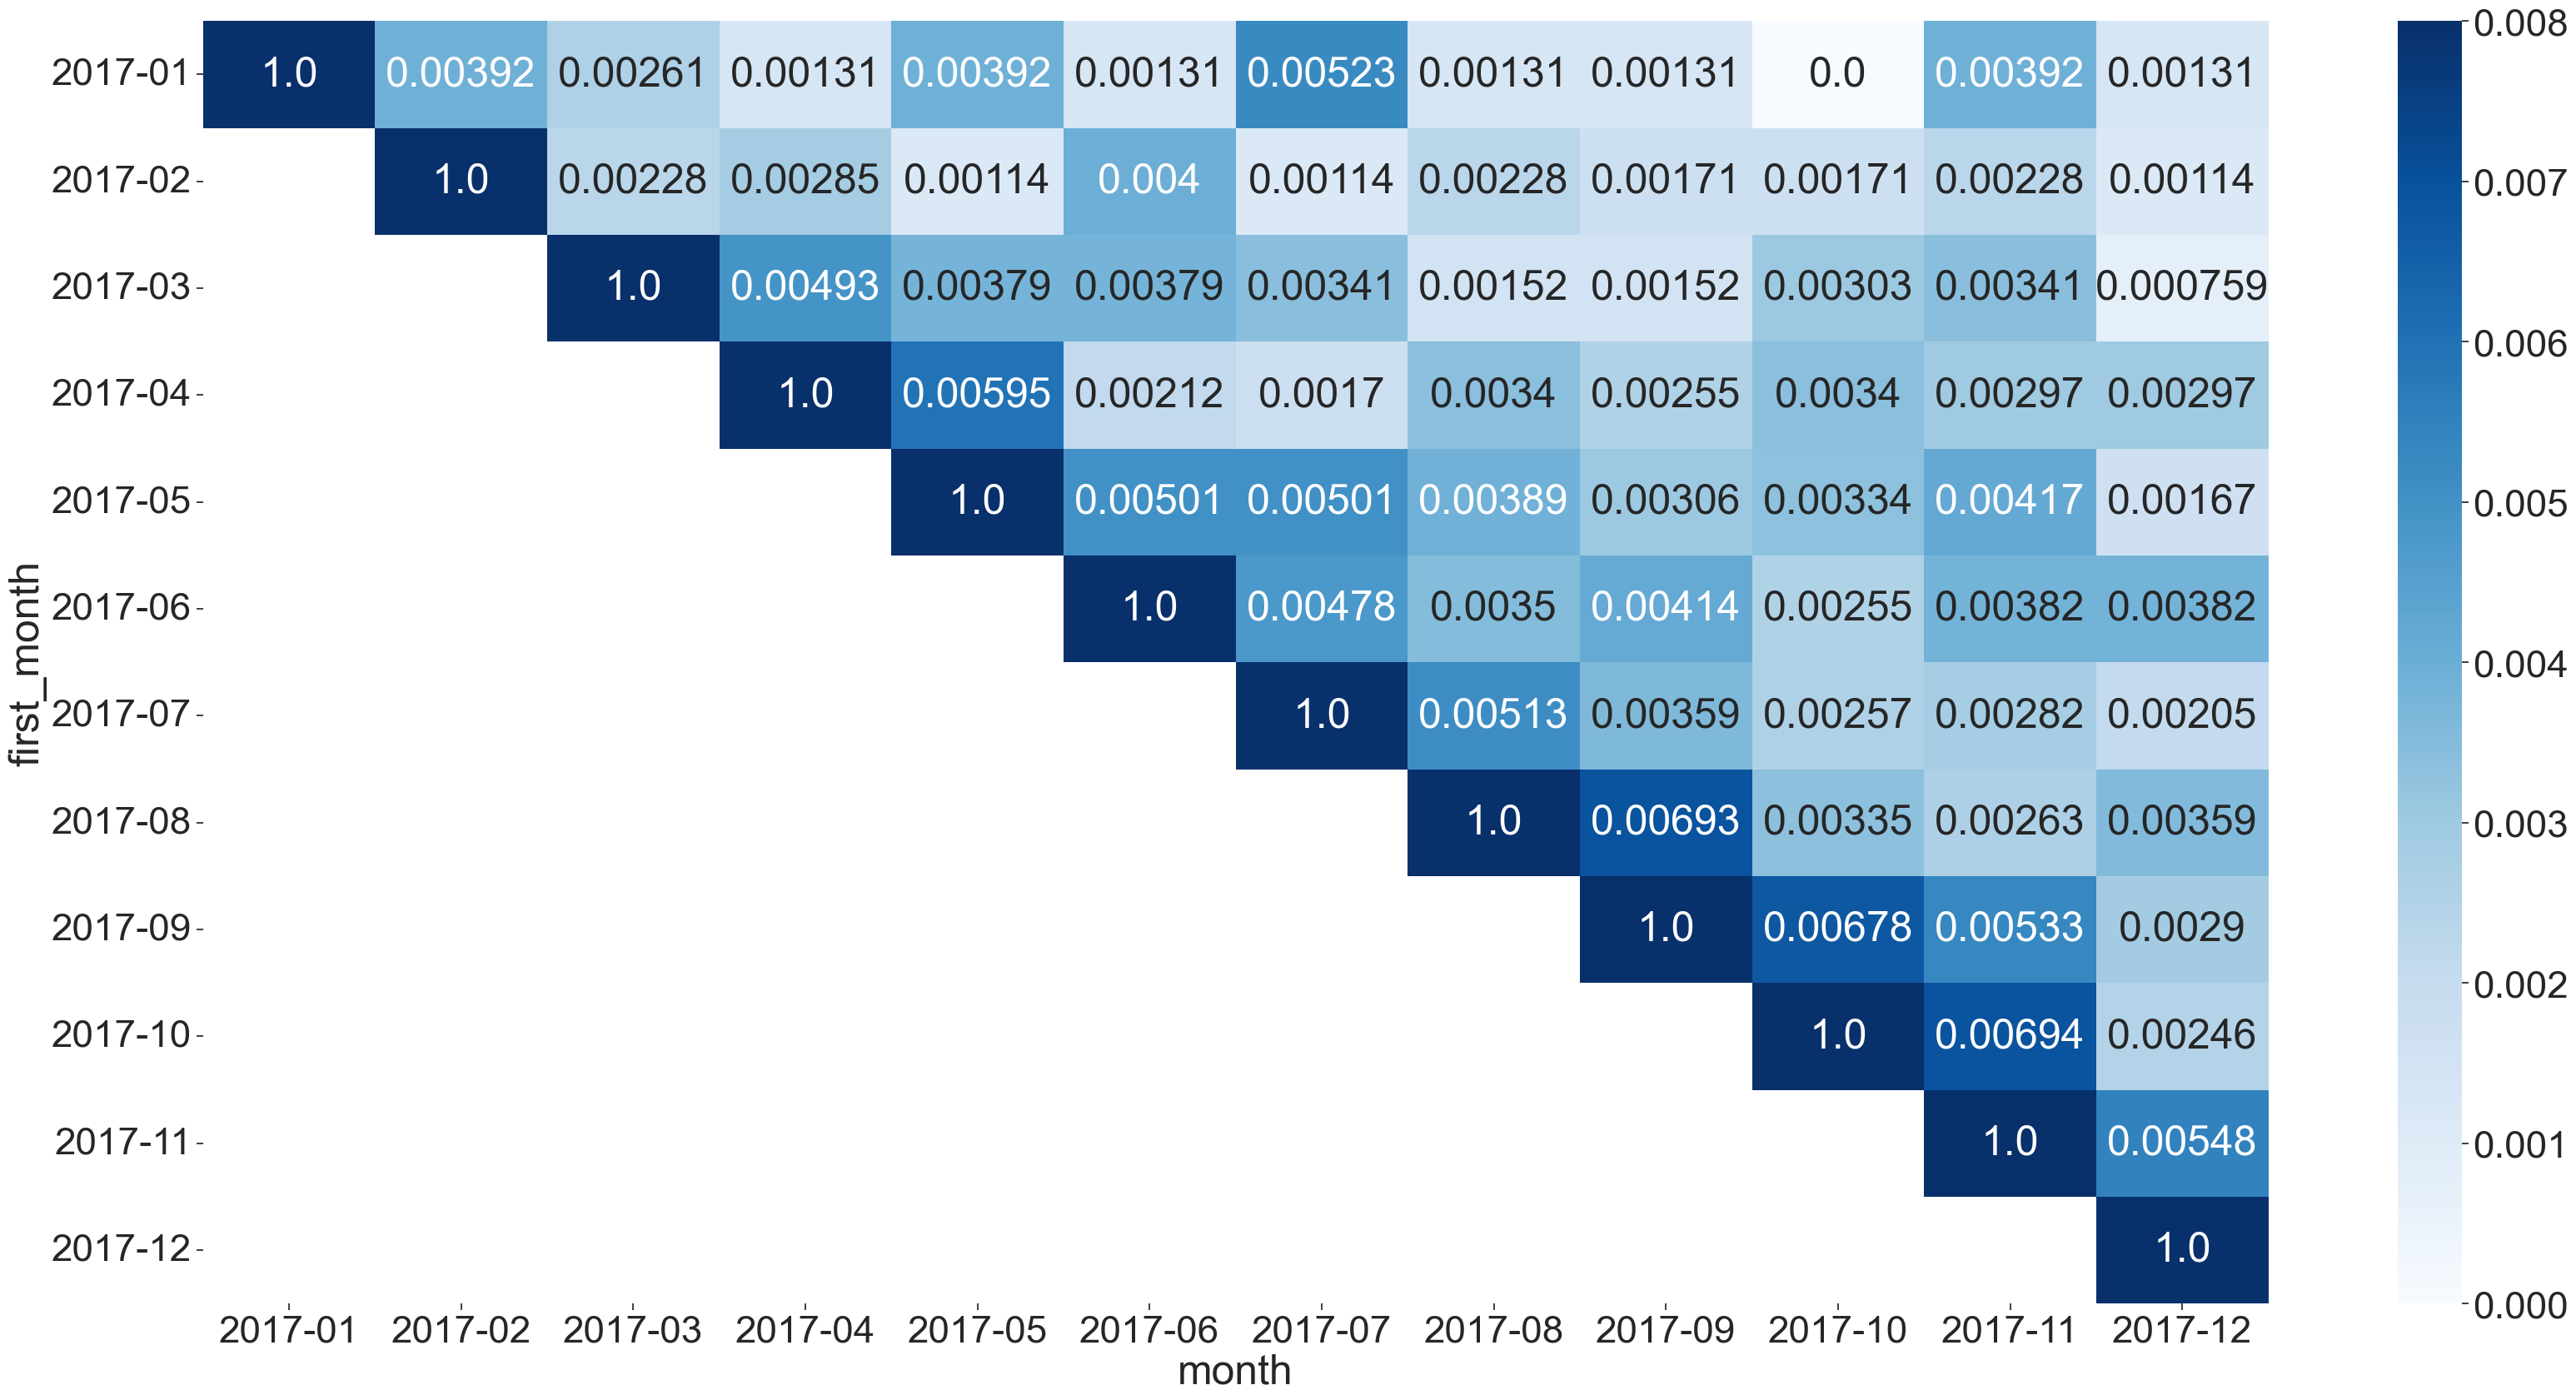

In [86]:
sns.set(style='ticks', font_scale=3)
plt.figure(figsize=(40, 20))
sns.heatmap(report_pivot, annot=True, fmt='.3', vmin=0.0, vmax=0.008, cmap='Blues')

Считаем разницу между всеми датами покупок и первой покупки пользователей и записываем в столбец 'lifetime' 

In [51]:
report['month'] = pd.to_datetime(report['month'])
report['first_month'] = pd.to_datetime(report['first_month'])

In [52]:
report['lifetime'] = ((report['month'] - report['first_month'])/np.timedelta64(1, 'M')).round().astype(int)

In [53]:
report['first_month'] = pd.to_datetime(report['first_month']).dt.strftime('%Y-%m')

Cтроим сводную таблицу по столбцу "lifetime" и получим наш когортный аналази по ретеншн:

In [54]:
retantion = report.pivot_table(index='first_month',columns = 'lifetime', values = 'active', aggfunc='mean')
retantion

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_month,,,,,,,,,,,,
2017-01,1.0,0.003922,0.002614,0.001307,0.003922,0.001307,0.005229,0.001307,0.001307,0.000000,0.003922,0.001307
2017-02,1.0,0.002283,0.002854,0.001142,0.003995,0.001142,0.002283,0.001712,0.001712,0.002283,0.001142,NaN
2017-03,1.0,0.004932,0.003794,0.003794,0.003414,0.001517,0.001517,0.003035,0.003414,0.000759,NaN,NaN
2017-04,1.0,0.005950,0.002125,0.001700,0.003400,0.002550,0.003400,0.002975,0.002975,NaN,NaN,NaN
2017-05,1.0,0.005006,0.005006,0.003893,0.003059,0.003337,0.004171,0.001669,NaN,NaN,NaN,NaN
2017-06,1.0,0.004779,0.003504,0.004141,0.002549,0.003823,0.003823,NaN,NaN,NaN,NaN,NaN
2017-07,1.0,0.005135,0.003594,0.002567,0.002824,0.002054,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,1.0,0.006931,0.003346,0.002629,0.003585,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,1.0,0.006778,0.005326,0.002905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Построим график:

<Axes: title={'center': 'Cohorts: User Retention'}, xlabel='lifetime', ylabel='first_month'>

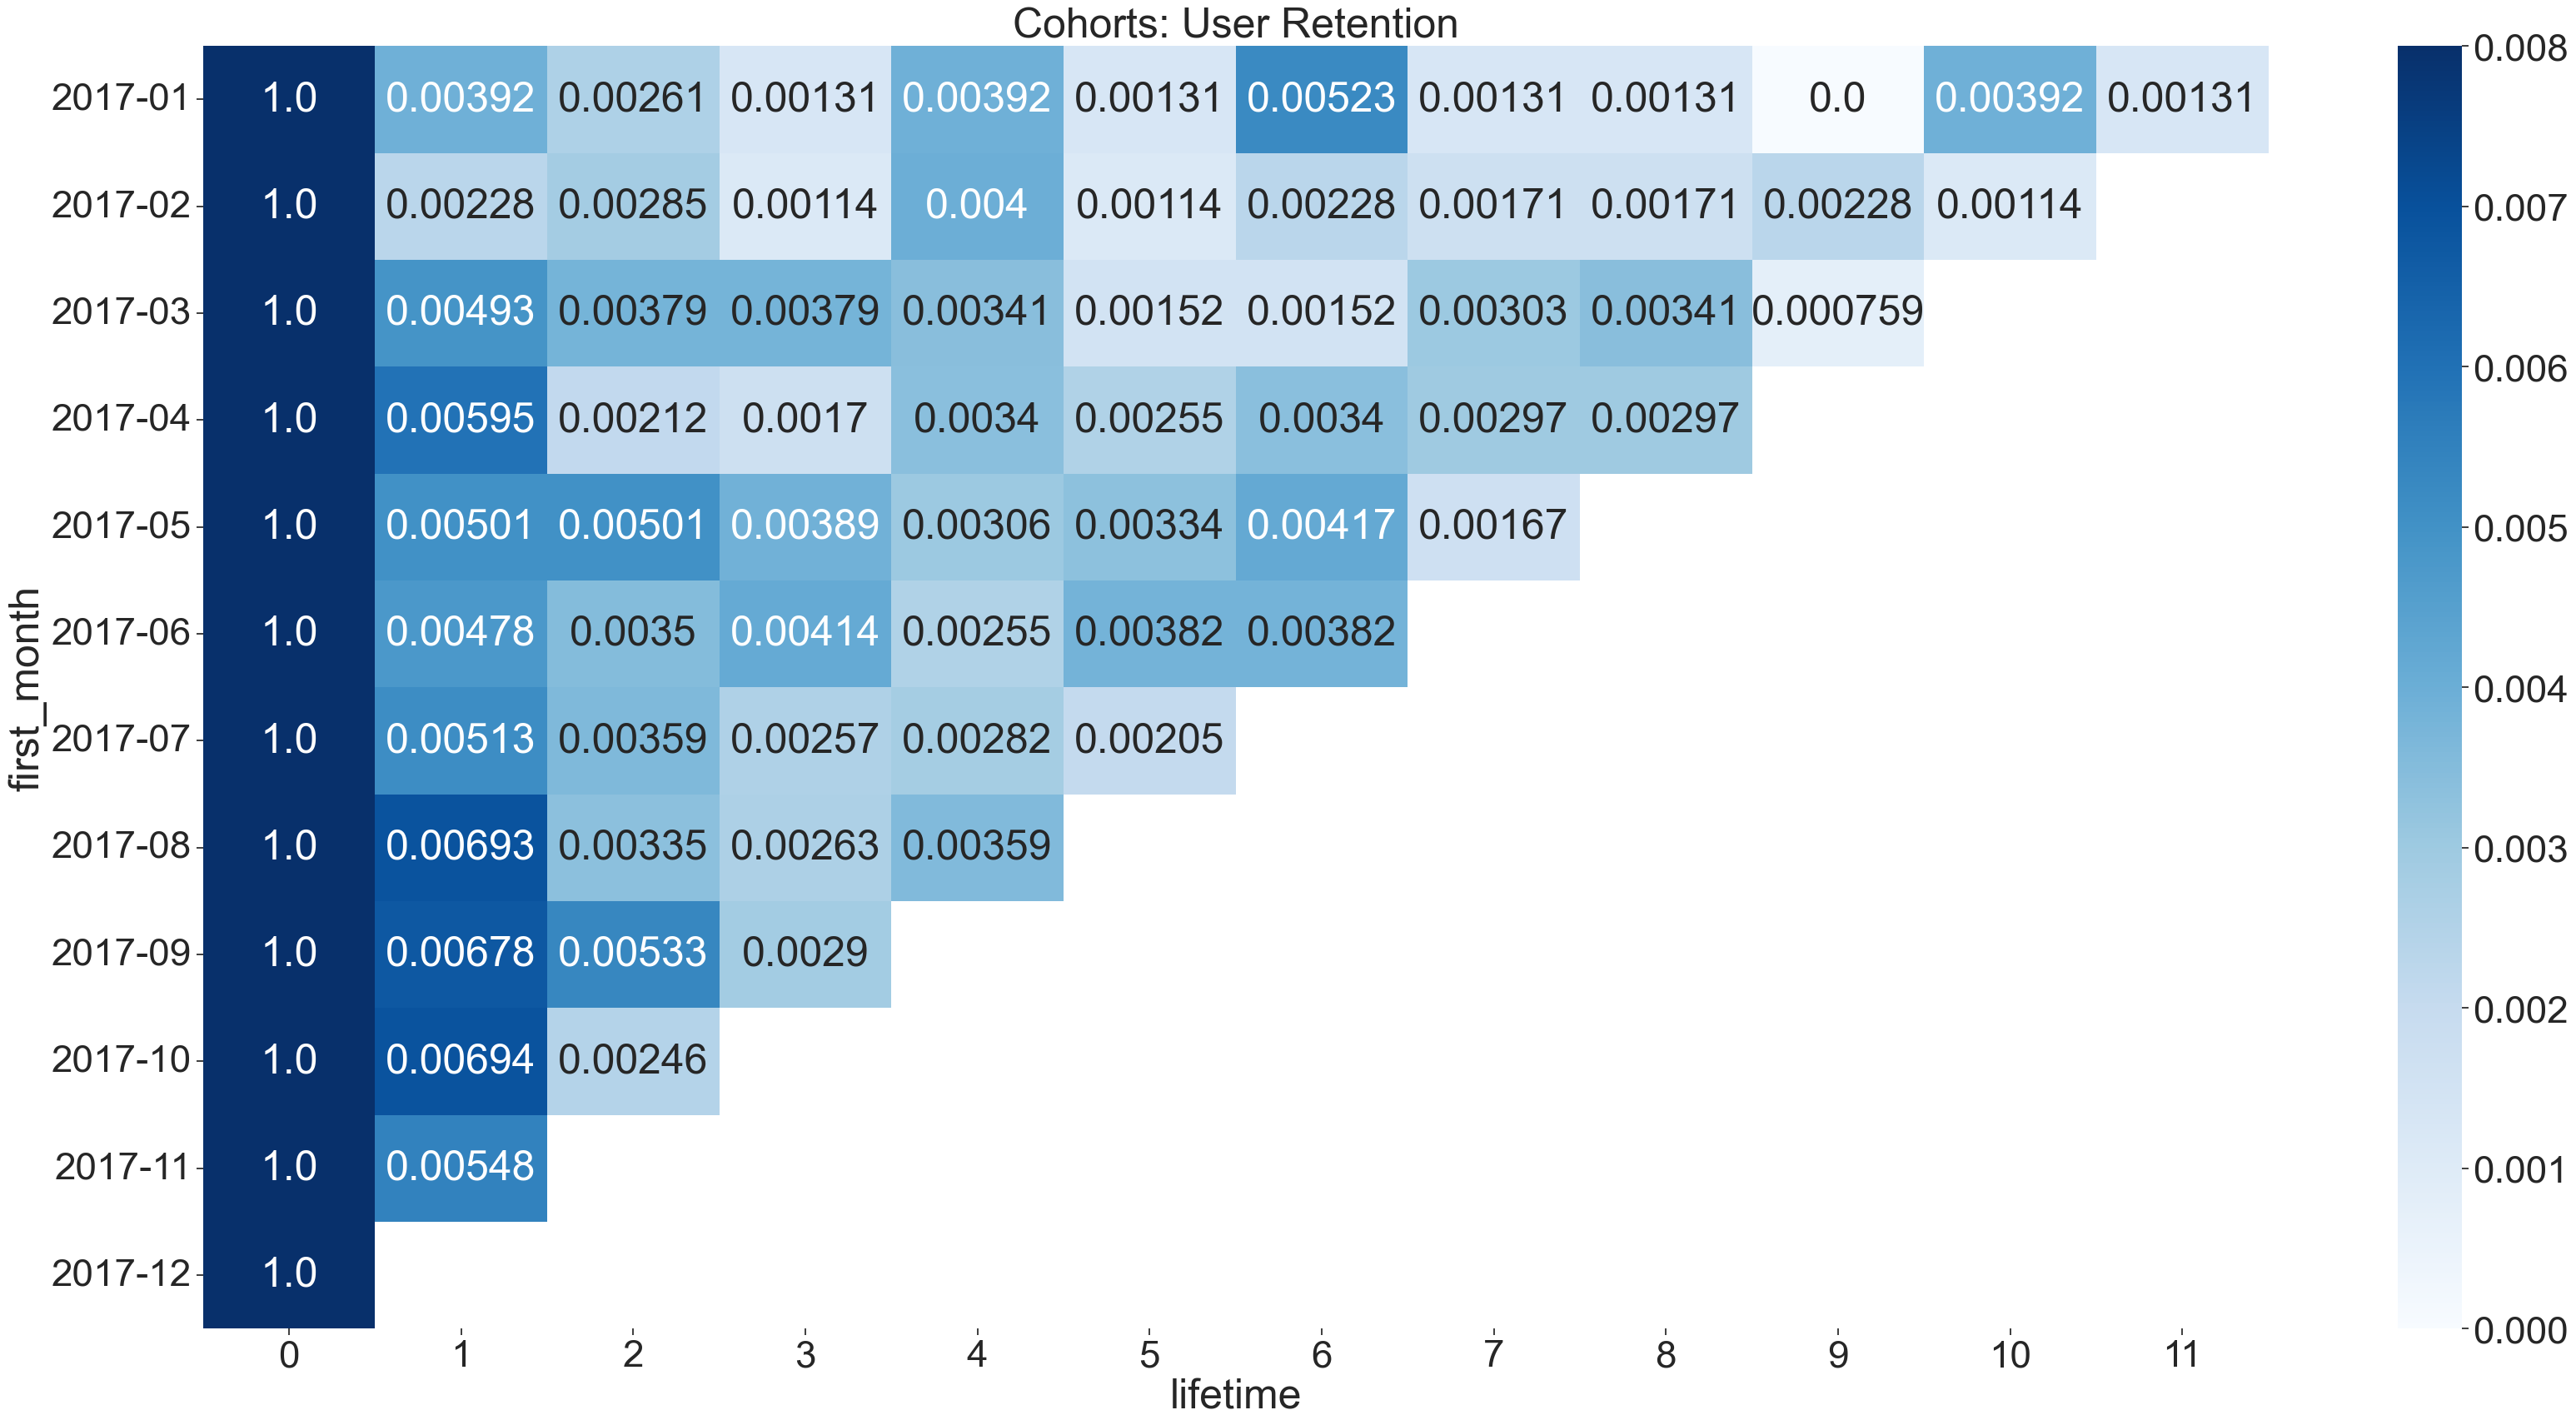

In [84]:
sns.set(style='ticks', font_scale=3)
plt.figure(figsize=(40, 20))
plt.title('Cohorts: User Retention')
sns.heatmap(retantion, annot=True, fmt='.3', vmin=0.0, vmax=0.008, cmap='Blues')

<b> Ответ </b> 

В период с января по декабрь когорта с самым высоким retention на 3й месяц является  июнь (2017-06-01) со значением	равным 0.004141

## RFM - анализ
<a id='3'></a>

<b> Вопрос 6 </b> 

Построим RFM-сегментацию пользователей.

Чтобы получить оценку RFM клиента, нам нужно сначала рассчитать оценки R, F и M по шкале от 1 (худший) до 5 (лучший).

 - 1.рассчитать Recency = количество дней с момента последней покупки
 - 2.рассчитать Freqency = количество покупок за исследуемый период (обычно один год)
 - 3.рассчитать Monetary  = общая сумма покупок, сделанных за исследуемый период
 - 4.найти квинтили для каждого из этих измерений
 - 5.дайте оценку каждому параметру в зависимости от того, в каком квинтиле он находится
 - 6.объединить баллы R, F и M, чтобы получить балл RFM
 - 7.сопоставить оценки RF с сегментами

Выбираем из датасетов нужные нам данные:

    Из таблицы заказов берём "customer_id" и "order_id" - по ним будем объединять, 
    "order_approved_at" - интересущее нас подтверждение оплаты.
    
    Из таблицы пользователей берём "customer_id" - по нему будем объединять, 
    "customer_unique_id" - по нему будем считать кол-во пользователей
    
    Из таблицы товарных позиций берём "order_id" - по нему будем объединять, 
    "price" и "order_item_id" - по ним будем считать сумму.

In [131]:
Ords_m6 = Ords[['customer_id','order_approved_at','order_id']] 
Cust_m6 = Cust[['customer_id','customer_unique_id']]
Ord_m6 = Ord[['order_id','order_item_id','price']]

Объединяем созданные датасеты по "customer_id":

In [132]:
Six_zd = Ords_m6.merge(Cust_m6, how='inner', on = 'customer_id')

Объединяем созданные датасеты по "customer_id" :

In [133]:
Six_zd_1 = Six_zd.merge(Ord_m6, how='inner', on = 'order_id')

Приводим данные столбца order_approved_at к типу даты:

In [134]:
Six_zd_1["order_approved_at"] = pd.to_datetime(Six_zd_1["order_approved_at"])
Six_zd_1

,customer_id,order_approved_at,order_id,customer_unique_id,order_item_id,price
0,9ef432eb6251297304e76186b10a928d,2017-10-02 11:07:15,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,1,29.99
1,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-26 03:24:27,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,1,118.70
2,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:55:23,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,1,159.90
3,f88197465ea7920adcdbec7375364d82,2017-11-18 19:45:59,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,1,45.00
4,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 22:20:29,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,1,19.90
...,...,...,...,...,...,...
112645,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 13:10:37,63943bddc261676b46f01ca7ac2f7bd8,da62f9e57a76d978d02ab5362c509660,1,174.90
112646,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 15:04:16,83c1379a015df1e13d02aae0204711ab,737520a9aad80b3fbbdad19b66b37b30,1,205.99
112647,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:36:21,11c177c8e97725db2631073c19f07b62,5097a5312c8b157bb7be58ae360ef43c,1,179.99
112648,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:36:21,11c177c8e97725db2631073c19f07b62,5097a5312c8b157bb7be58ae360ef43c,2,179.99


Для RFM анализа обычно используют период равный 1-му году. Отфильтруем наши даты и оставим только 2017 год.

In [135]:
Six_zd_1 = Six_zd_1.loc[(Six_zd_1['order_approved_at'] >= '2017-01-01') & (Six_zd_1['order_approved_at'] < '2018-01-01')]

Группируем данные и считаем потраченную сумму:

In [136]:
Six_zd_2 = Six_zd_1.groupby(['order_id', 'order_approved_at', 'customer_unique_id']).agg({'price': lambda x: x.sum()}).reset_index()
Six_zd_2

,order_id,order_approved_at,customer_unique_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 09:45:35,871766c5855e863f6eccc05f988b23cb,58.90
1,00018f77f2f0320c557190d7a144bdd3,2017-04-26 11:05:13,eb28e67c4c0b83846050ddfb8a35d051,239.90
2,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-04 14:10:13,64b576fb70d441e8f1b2d7d446e483c5,199.90
3,00048cc3ae777c65dbb7d2a0634bc1ea,2017-05-17 03:55:27,85c835d128beae5b4ce8602c491bf385,21.90
4,00054e8431b9d7675808bcb819fb4a32,2017-12-10 12:10:31,635d9ac1680f03288e72ada3a1035803,19.90
...,...,...,...,...
44503,fffa82886406ccf10c7b4e35c4ff2788,2017-12-18 17:33:04,2a3ab9bf9639491997586882c502540a,229.90
44504,fffb0b1a50e65c449020434fa835e078,2017-04-12 16:45:12,b2d2b4204f7fc4b4aeca38e3cd680a7e,4.90
44505,fffb9224b6fc7c43ebb0904318b10b5f,2017-10-28 02:55:58,f736308cd9952b33b90b9fe94da9c8f5,220.00
44506,fffce4705a9662cd70adb13d4a31832d,2017-10-24 17:14:25,cd79b407828f02fdbba457111c38e4c4,99.90


Рассчитаем дату которая будет ориентиром для подсчёта Recency баллов:

In [137]:
NOW = Six_zd_2['order_approved_at'].max() + timedelta(days=1)
NOW

Timestamp('2018-01-01 23:32:40')

Мы рассчитываем период равный одному 2017 году, введем переменную равную 365(дней):

In [138]:
period = 365

Добавим столбец в котором будет храниться разница между покупкой и крайней датой (которая хранится в переменной NOW)

In [139]:
Six_zd_2['DaysSinceOrder'] = Six_zd_2['order_approved_at'].apply(lambda x: (NOW - x).days)

Рассчитаем Recency (количество дней с момента последней покупки) и 
Frequency (количество покупок за исследуемый период)

In [140]:
aggr = {
    'DaysSinceOrder': lambda x: x.min(),  #  количество дней с момента последнего заказа 
    'order_approved_at': lambda x: len([d for d in x if d >= NOW - timedelta(days=period)])}# общее количество заказов за последний период
rfm = Six_zd_2.groupby('customer_unique_id').agg(aggr).reset_index() # производим группировку по клиентам и считаем значения
rfm.rename(columns={'DaysSinceOrder': 'Recency', 'order_approved_at': 'Frequency'}, inplace=True) # переименовываем колонки

Рассчитаем общую сумму покупок:

In [141]:
rfm['Monetary'] = rfm['customer_unique_id'].apply(lambda x: Six_zd_2[(Six_zd_2['customer_unique_id'] == x) & \
                                                           (Six_zd_2['order_approved_at'] >= NOW - timedelta(days=period))]\
                                                           ['price'].sum())

Код выше, считается долго, где-то минуты 3-5, так что терпения :3

<b> Будем использовать метод квантилей </b> 

Каждый квантиль содержит 20% клиентов, разделим наши значения по квантилям:

In [142]:
quintiles = rfm[['Recency', 'Frequency', 'Monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'Recency': {0.2: 38.0, 0.4: 92.0, 0.6: 156.0, 0.8: 232.0},
 'Frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'Monetary': {0.2: 39.9, 0.4: 68.9, 0.6: 108.9, 0.8: 179.98}}

Посмотрим % пользователей с одной покупкой

In [143]:
rfm.loc[rfm.Frequency==1].Frequency.count() / rfm.Frequency.count() *100

97.15907774301935

Обратим внимание, что у нас 97% пользователей с одной покупкой, и ранжирование будет некоректное(из квантилей будет только 2 значения 1 и 5), а впоследствии будет неккоректное разделение на кластеры.

<b> Моё решение взять из множеств Frequency, Recency, Monetary уникальные значения и по ним найти новые квантили. И далее провести новый RFM - анализ. </b>

<b> Введём свои кластеры, для удобной работы с "статусом" клиентов и их показателями </b> 

 - <b>Потерянные</b>  - покупок было мало и давно, маленькая выручка. 
 - <b>Потерянные перспективые</b>  - покупок было много,но давно с маленькой выручкой.  
 - <b>Спящие</b> 
         - Покупок было достаточно, но давно, средняя выручка.
 - <b>Нужно удержать</b> 
         - Покупок было много, но давно, высокая выручка.
 - <b>Нужно реанимировать</b> 
         - Давность - средняя,частота и выручка - маленькая. Нужно с ними работать.
 - <b>ALARM!</b> 
         - Давность и выручка  - выше средней,частота - маленькая нужно удерживать.
 - <b>Перспективный</b> 
         - Пришли недавно,не мало заказов, выручка высокая.
 - <b>Многообещающие</b> 
         - Пришли недавно, частота средняя,выуручка низкая, 
 - <b>Потенциальный клиент</b> 
         - Недавние клиенты со средней выручкой и маленькой выручкой  .
 - <b>Лояльные</b> 
         - Покупают на регулярной основе со средней выручкой.
 - <b>Золотые</b> 
         - Покупают много и часто с высокой выручкой, нельзя терять.

Берём уникальные значения:

In [144]:
fr = rfm.Frequency.unique()
re = rfm.Recency.unique()
mo = rfm.Monetary.unique()

In [145]:
print(np.quantile(re,[.2, .4, .6, .8]))
print(np.quantile(fr,[.2, .4, .6, .8]))
print(np.quantile(mo,[.2, .4, .6, .8]))

[ 73. 145. 217. 289.]
[2.2 3.4 4.6 5.8]
[ 56.95 118.91 205.99 399.6 ]


Напишем функции которые будут присваивать значения от 1 до 5 в зависимости от присвоенных квантилей.

In [146]:
def r_sc(x):
    if x <= np.quantile(re,.2):
        return 5
    elif x <= np.quantile(re,.4):
        return 4
    elif x <= np.quantile(re,.6):
        return 3
    elif x <= np.quantile(re,.8):
        return 2
    else:
        return 1

def f_sc(x):
    if x <= np.quantile(fr,.2):
        return 1
    elif x <= np.quantile(fr,.4):
        return 2
    elif x <= np.quantile(fr,.6):
        return 3
    elif x <= np.quantile(fr,.8):
        return 4
    else:
        return 5

def m_sc(x):
    if x <= np.quantile(mo,.2):
        return 1
    elif x <= np.quantile(mo,.4):
        return 2
    elif x <= np.quantile(mo,.6):
        return 3
    elif x <= np.quantile(mo,.8):
        return 4
    else:
        return 5 

Применим наши функции и получим R,F,M оценки каждого клиента:

In [147]:
rfm['RR'] = rfm['Recency'].apply(lambda x: r_sc(x))
rfm['FF'] = rfm['Frequency'].apply(lambda x: f_sc(x))
rfm['MM'] = rfm['Monetary'].apply(lambda x: m_sc(x))

Мы добились, чего хотели и разделили наши значения Frequency на 5 квантилей.

In [148]:
rfm['FF'].unique()

array([1, 2, 5, 4, 3], dtype=int64)

Создадим колонку которая будет содержать себе объединенную оценку RFM: 

In [149]:
rfm['RFM Score'] = rfm['RR'].map(str) + rfm['FF'].map(str) + rfm['MM'].map(str)
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary,RR,FF,MM,RFM Score
0,0000f46a3911fa3c0805444483337064,297,1,69.00,1,1,2,112
1,0000f6ccb0745a6a4b88665a16c9f078,81,1,25.99,4,1,1,411
2,0004aac84e0df4da2b147fca70cf8255,48,1,180.00,5,1,3,513
3,0005e1862207bf6ccc02e4228effd9a0,302,1,135.00,1,1,3,113
4,0006fdc98a402fceb4eb0ee528f6a8d4,167,1,13.90,3,1,1,311


Присваиваем кластеризацию клиентов к значениям R и F:

In [151]:
segt_map = {
    r'[1-2][1-2][1-2]': 'Потерянные',
    r'[1-2][3-5][1-2]': 'Потерянные перспективые',
    r'[1-2][1-2][3-4]': 'Спящие',
    r'[1-2][1-5]5': 'Нужно удержать',
    r'3[1-2][1-2]': 'Нужно реанимировать',
    r'3[1-2]3': 'ALARM!',
    r'[3-4][1-5][4-5]': 'Перспективный',
    r'4[1-5]1': 'Многообещающий',
    r'5[1-5]1': 'Потенциальный клиент',
    r'[4-5][1-5][2-3]': 'Лояльные',
    r'5[1-5][4-5]': 'Золотые'
}

rfm['Segment'] = rfm['RR'].map(str) + rfm['FF'].map(str) + rfm['MM'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary,RR,FF,MM,RFM Score,Segment
0,0000f46a3911fa3c0805444483337064,297,1,69.00,1,1,2,112,Потерянные
1,0000f6ccb0745a6a4b88665a16c9f078,81,1,25.99,4,1,1,411,Многообещающий
2,0004aac84e0df4da2b147fca70cf8255,48,1,180.00,5,1,3,513,Лояльные
3,0005e1862207bf6ccc02e4228effd9a0,302,1,135.00,1,1,3,113,Спящие
4,0006fdc98a402fceb4eb0ee528f6a8d4,167,1,13.90,3,1,1,311,Нужно реанимировать


In [152]:
segmentation=rfm.groupby('Segment', as_index=False)  \
                .agg({'customer_unique_id':'count'}) \
                .rename(columns={'customer_unique_id':'count_customer'}) \
                .sort_values('count_customer', ascending=False)
segmentation

,Segment,count_customer
2,Лояльные,12967
8,Потерянные,6571
4,Нужно реанимировать,5440
7,Потенциальный клиент,4567
10,Спящие,3157
3,Многообещающий,2977
6,Перспективный,2840
1,Золотые,2312
0,ALARM!,1728
5,Нужно удержать,593


Строим диаграмму кластеризации клиентов: 

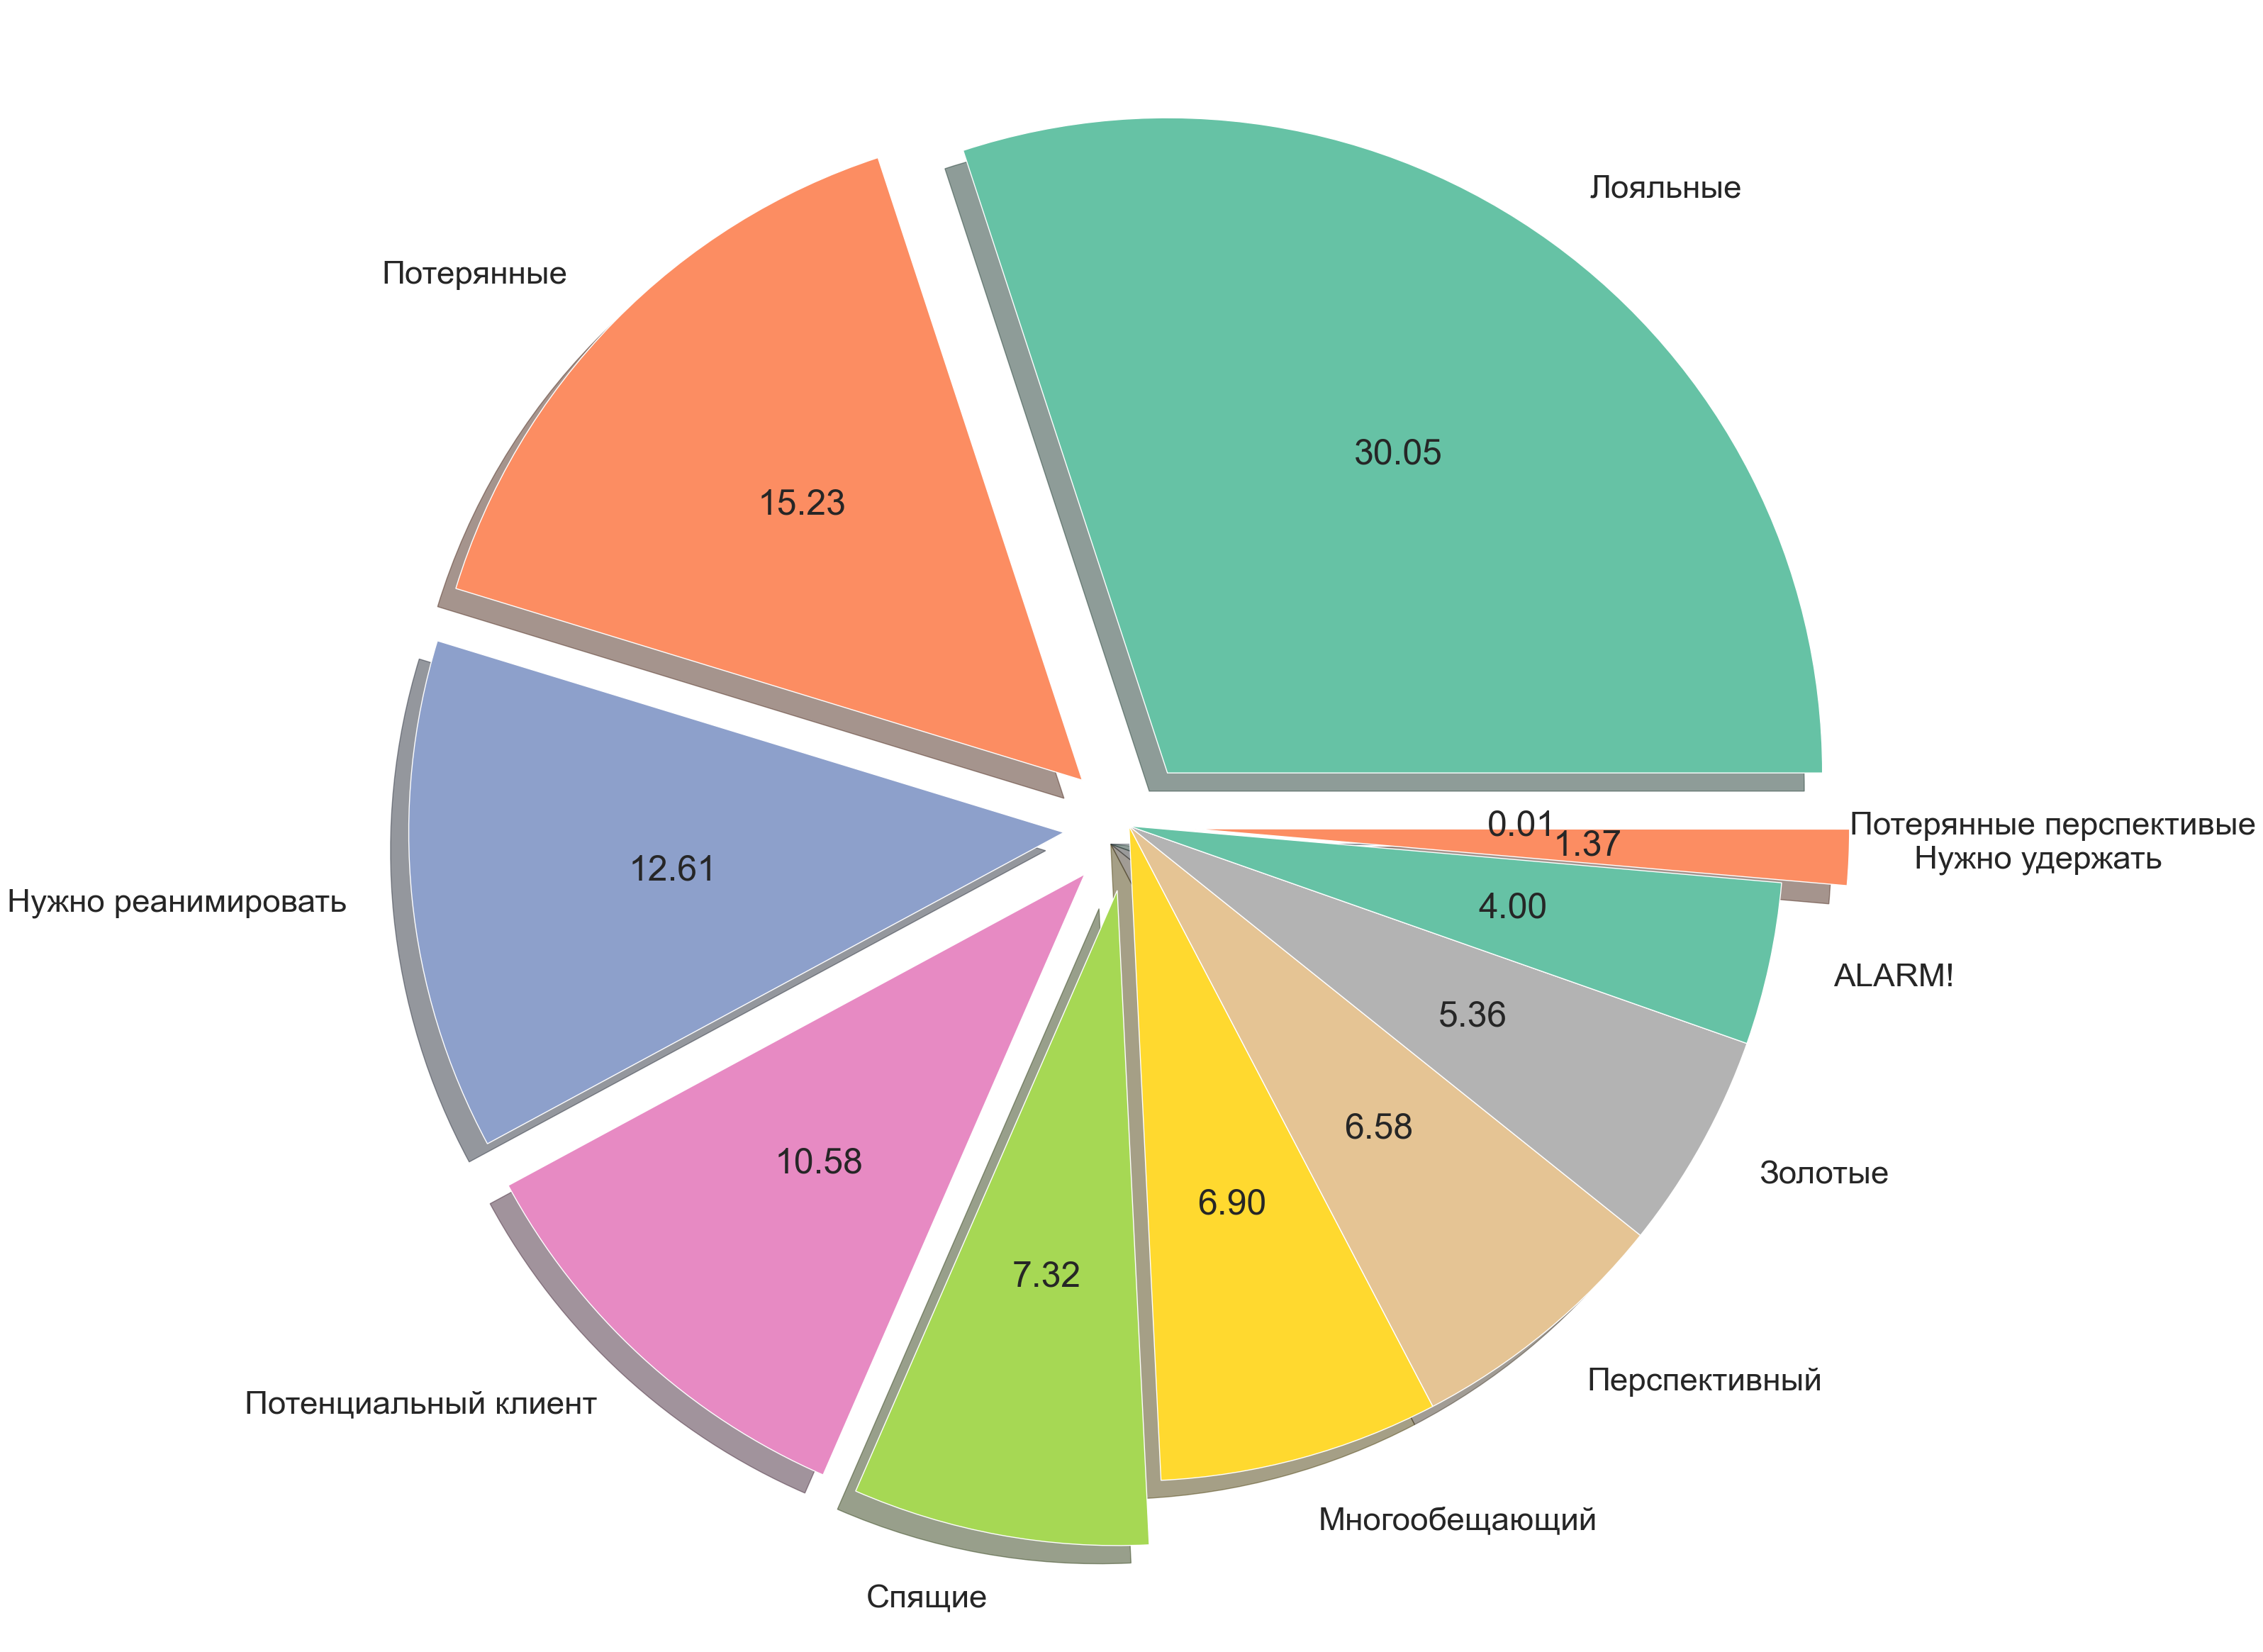

In [237]:
fig = plt.figure(figsize=(30, 30))
ax = fig.add_subplot()
vals = segmentation['count_customer']
labels = segmentation['Segment']
exp = (0.1, 0.1, 0.1, 0.1, 0.1, 0, 0, 0, 0, 0.1, 0)
ax.pie(vals, labels=labels, autopct='%.2f', explode=exp, shadow=True,
    colors=sns.color_palette('Set2'))
plt.show()

<Axes: xlabel='count_customer', ylabel='Segment'>

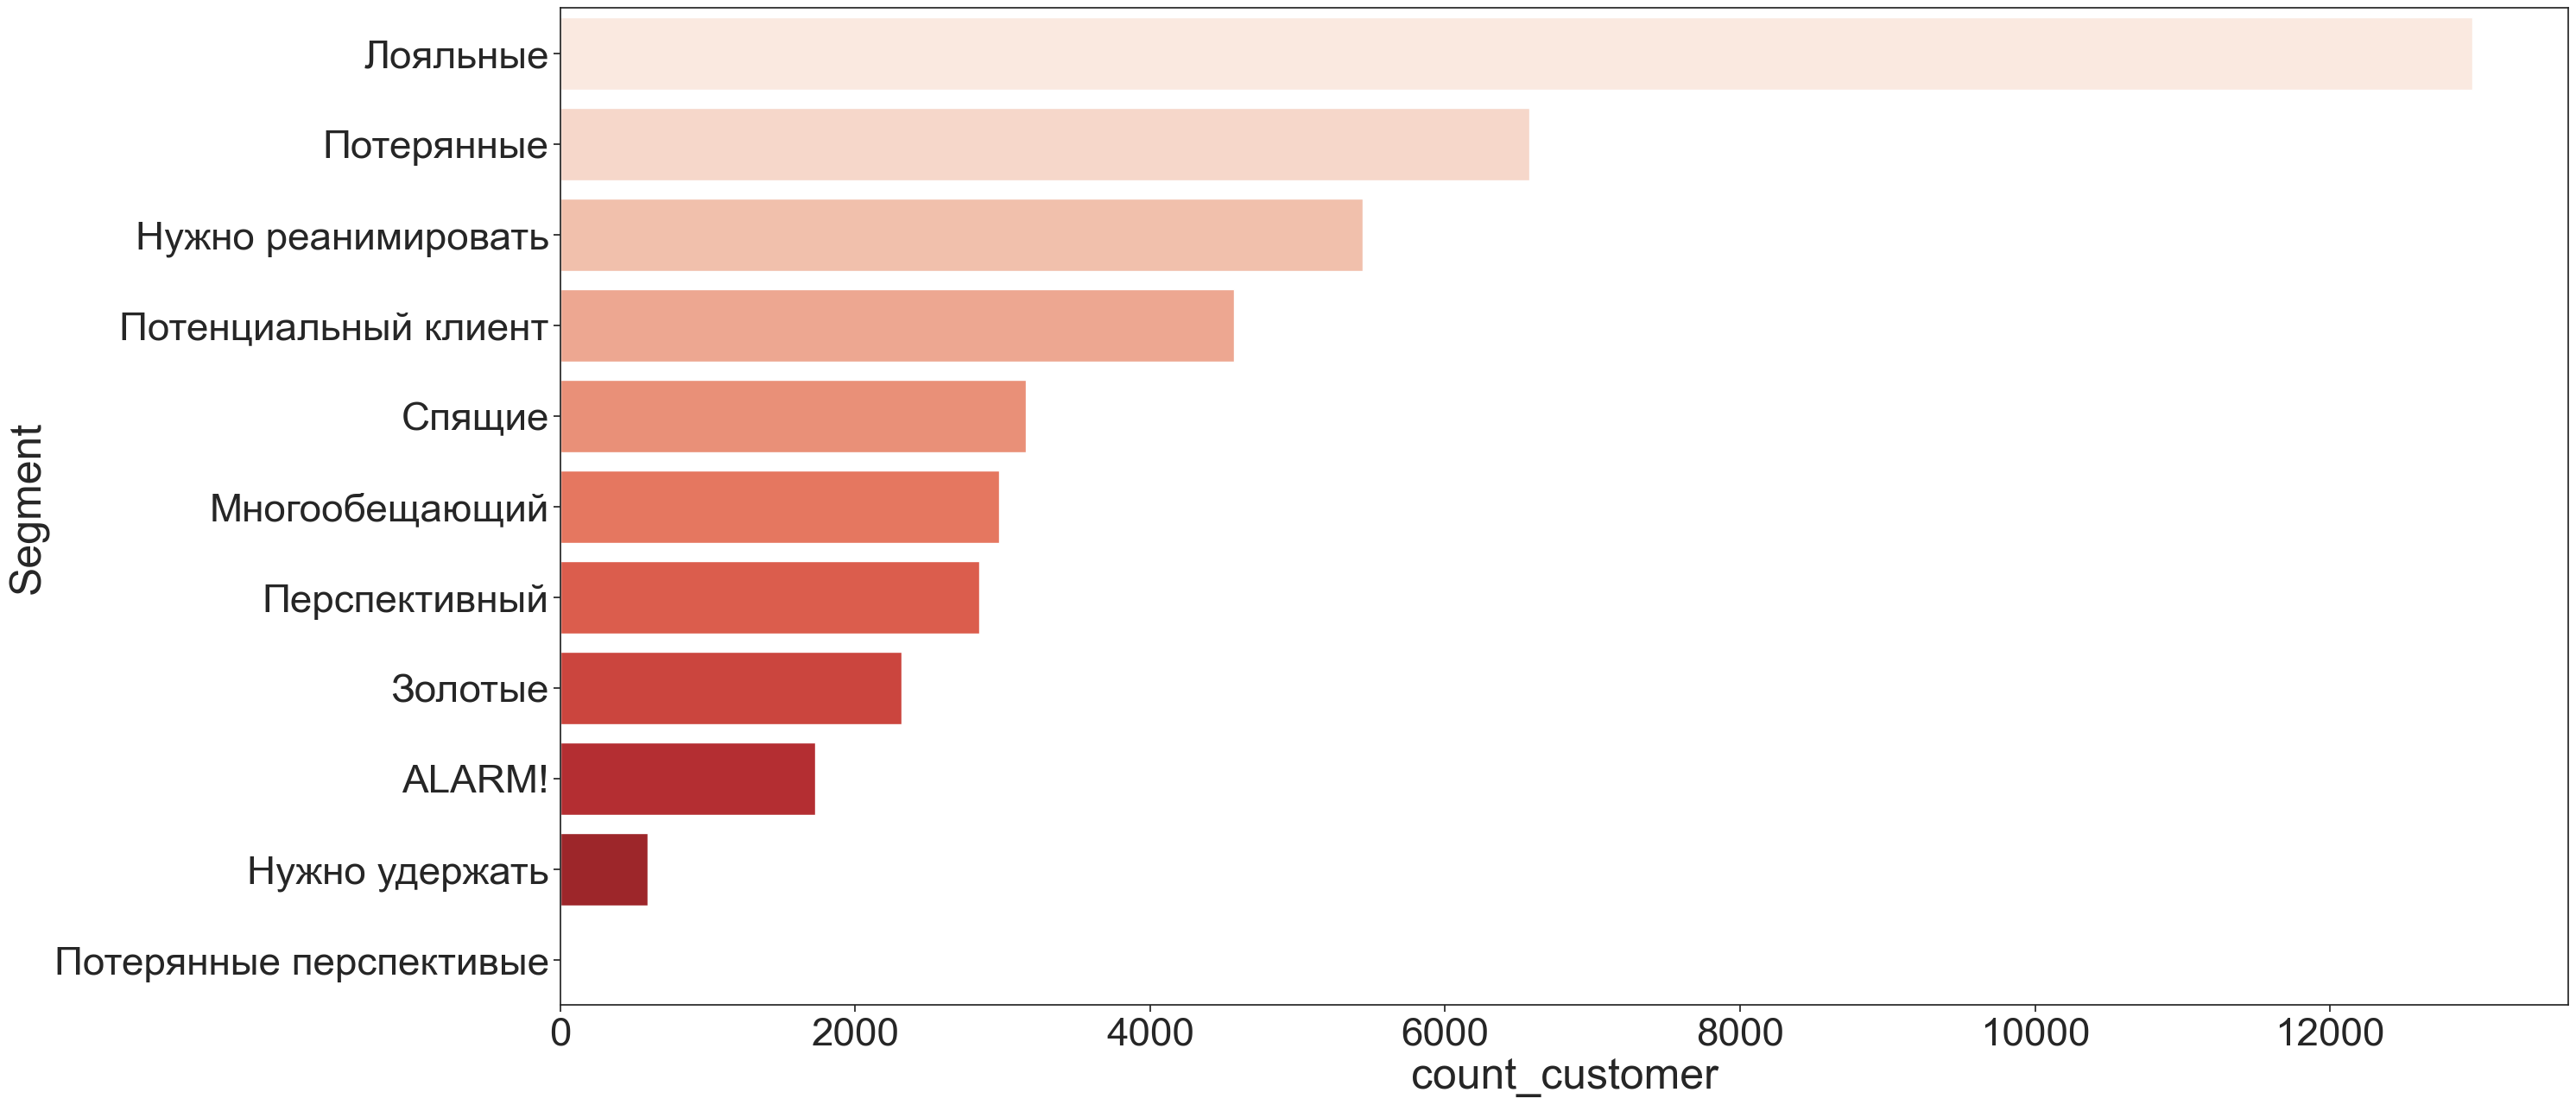

In [233]:
plt.figure(figsize=(30,15))
sns.barplot(x='count_customer', y='Segment', data = segmentation,palette='Reds')
